# Regresión lineal

Se importan las librerias NumPy, Pandas, Matplotlib, Scikit Learn y MLxtend:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Se creó un DataFrame que contiene la lista de elementos a trabajar:

In [2]:
df = pd.read_csv('datosrahm2.csv')

El DataFrame contiene la siguiente información:

In [3]:
df

,Symbol,Z,elecPau,atradrahm,Zeff,s,p,d,f,ve
0,H,1,2.20,1.54,1.00,1,0,0,0,1
1,He,2,NaN,1.34,1.70,2,0,0,0,2
2,Li,3,0.98,2.20,1.30,1,0,0,0,1
3,Be,4,1.57,2.19,1.95,2,0,0,0,2
4,B,5,2.04,2.05,2.60,2,1,0,0,3
5,C,6,2.55,1.90,3.25,2,2,0,0,4
6,N,7,3.04,1.79,3.90,2,3,0,0,5
7,O,8,3.44,1.71,4.55,2,4,0,0,6
8,F,9,3.98,1.63,5.20,2,5,0,0,7
9,Ne,10,NaN,1.56,5.85,2,6,0,0,8


Se tienen los primeros 96 elementos de la tabla periódica con sus respectivas características que posteriormente, serán llamadas variables. Donde Z es el número atómico; elecPau es el valor de electronegatividad de Pauling; radio atómico (atradrahm); la carga nuclear efectiva (Zeff); electrones más externos en los orbitales s, p, d, y f y, los electrones de valencia (ve). 

## 1.  Relaciones entre las variables usando una matriz de correlación

A continuación, se crea una matriz de correlación para cuantificar y resumir las relaciones lineales entre las variables. La matriz de correlación es una matriz cuadrada que contiene el coeficiente de correlación de Pearson (abreviado como r), que mide la dependencia lineal entre pares de características. Los coeficientes de correlación son en el rango de -1 a 1. Donde se sabe que las características tienen una correlación positiva perfecta si r = 1,
sin correlación si r = 0, y una correlación negativa perfecta si r = –1. 

Se utilizará la función corrcoef de NumPy en las nueve columnas de las características y la función de mapa de calor de MLxtend para trazar la matriz de correlación como mapa de calor:

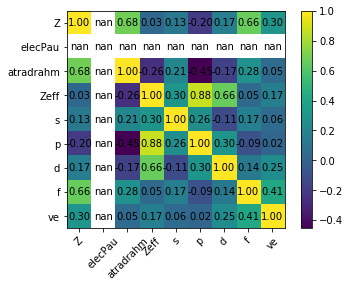

In [4]:
cols = ['Z', 'elecPau', 'atradrahm', 'Zeff', 's', 'p', 'd', 'f', 've']
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,row_names=cols, column_names=cols)
plt.show()

En la figura resultante, la matriz de correlación nos proporciona un gráfico de resumen que puede ayudar a seleccionar características basadas en sus respectivas correlaciones lineales.

Si se escoge como variable objetivo la carga nuclear efectiva, se observa que el factor de correlación lineal, r, muestra la mayor correlación con la variable p.

## 2. Implementación de un modelo de regresión lineal de mínimos cuadrados ordinarios

Utilizando el método de mínimos cuadrados ordinarios para estimar los parámetros de la línea de regresión lineal se minimiza la suma de las distancias verticales cuadradas. Se cargan los datos de los valores de Zeff y p para realizar la regresión lineal y obtener el valor de la pendiente y la intersección con el eje y:

In [5]:
X = df[['p']].values
y = df[['Zeff']].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Pendiente: %.3f' % slr.coef_[0])
print('Intersección: %.3f' % slr.intercept_)

Pendiente: 0.761
Intersección: 3.089


In [6]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

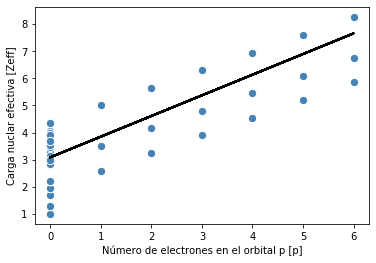

In [7]:
lin_regplot(X, y, slr)
plt.xlabel('Número de electrones en el orbital p [p]')
plt.ylabel('Carga nuclar efectiva [Zeff]')
plt.show()

A partir de la gráfica los datos dicen que el número de electrones en el orbital p no explica muy bien el valor de la carga nuclear efectiva. 

### 2.1 Método de estandarización de datos con descenso de gradiente

In [8]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
           return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
           return self.net_input(X)

Para ver el desempeño de LinearRegressionGD, se utiliza la variable p del DataSet como la variable explicativa y entrenemos un modelo que pueda predecir Zeff. Además, se estandarizarán las variables para una mejor convergencia del algoritmo GD (Gradient Descent). El código es el siguiente:

In [9]:
X = df[['p']].values
y = df['Zeff'].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

Se grafica la función de costo en función del número de épocas (iteraciones completas) sobre el conjunto de datos de entrenamiento cuando se utilizan algoritmos de optimización, como GD, para verificar que el algoritmo converge a un costo mínimo:

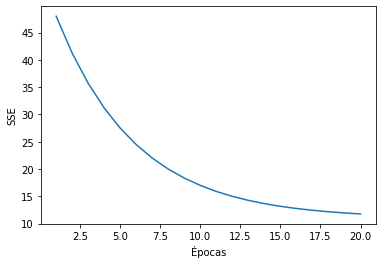

In [10]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Épocas')
plt.show()

Para visualizar qué tan bien la línea de regresión lineal corresponde a los datos de entrenamiento se define una función auxiliar simple que trazará un diagrama de dispersión de los ejemplos de entrenamiento y se agregará la línea de regresión:

In [11]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

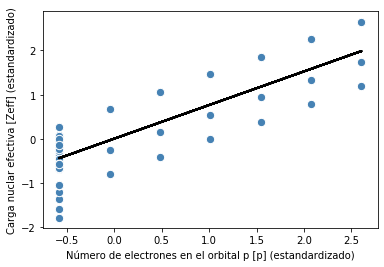

In [12]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Número de electrones en el orbital p [p] (estandardizado)')
plt.ylabel('Carga nuclar efectiva [Zeff] (estandardizado)')
plt.show()

Al ser el modelo con una r mayor, con la próxima línea de código se utilizará el modelo de regresión lineal previamente entrenado para predecir el valor de la carga nuclear efectiva cuando se tienen en el orbital p dos electrones:

In [13]:
electron_p_std = sc_x.transform(np.array([[2.0]]))
zeff_std = lr.predict(electron_p_std)
print("La carga nuclear efectiva: %.3f" % \
      sc_y.inverse_transform(zeff_std))

La carga nuclear efectiva: 4.519


Según el modelo, dados 2 electrones en el orbital p, se tiene una carga nuclear efectiva de 4.519

In [14]:
print('Pendiente: %.3f' % lr.w_[1])
print('Intersección: %.3f' % lr.w_[0])

Pendiente: 0.762
Intersección: -0.000


Cabe mencionar que técnicamente no se tiene que actualizar los valores de la intersección si se está trabajando con variables estandarizadas, ya que la intercepción del eje y siempre es 0 en esos casos.

## 3. Evaluación del desempeño del modelo de regresión lineal

Para evaluar el modelo, se divide el conjunto de datos en conjuntos de datos de entrenamiento y prueba separados, donde se usa el primero para ajustar el modelo y el segundo para evaluar su rendimiento sin ser visto para estimar el rendimiento. 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Una medida cuantitativa útil del rendimiento de un modelo es el llamado error cuadrático medio (MSE), que es simplemente el valor promedio del costo SSE que se minimizó para ajustar el modelo de regresión lineal:

In [16]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 0.517, test: 0.830


Se observa que el MSE en el conjunto de datos de entrenamiento es 0.517, y el MSE en el conjunto de datos de prueba es mayor, con un valor de 0.830, que es un indicador de que nuestro modelo está sobrevalorando (overfitting) los datos de entrenamiento en este caso. Sin embargo, la interpretación del MSE depende del conjunto de datos y la escala de características. Por lo tanto, puede ser más útil informar el coeficiente de determinación r^2, que puede entenderse como una versión estandarizada de la MSE, para una mejor interpretación del rendimiento del modelo:

In [17]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),
                                      r2_score(y_test, y_test_pred)))

R^2 train: 0.803, test: 0.695


Se observa que evaluado en los datos de entrenamiento, el r^2 del modelo es 0.803. Sin embargo, el r^2 en el conjunto de datos de prueba es 0.695. 